In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# New Section

In [5]:
# 1. Load the data
df = pd.read_csv("apples_and_oranges.csv")
print("Initial Data:")
print(df.head())

Initial Data:
   Weight  Size   Class
0      69  4.39  orange
1      69  4.21  orange
2      65  4.09  orange
3      72  5.85   apple
4      67  4.70  orange


In [6]:
# 2. Data Cleaning
# Drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Handle missing values
df.dropna(inplace=True)  # or use fillna if you want to impute

In [8]:
# 3. Data Preprocessing
# Convert categorical columns using LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [9]:
# Split into features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

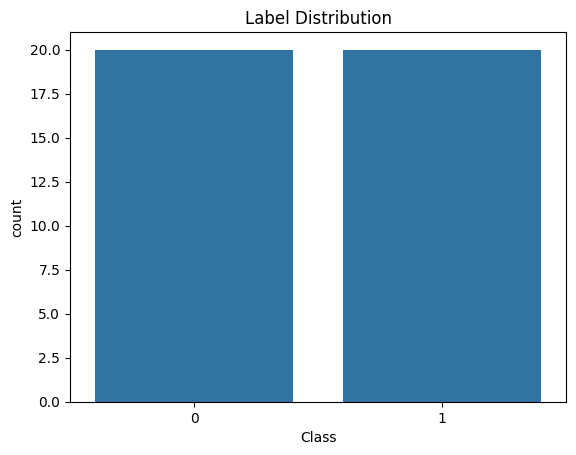

In [11]:
# 4. Data Visualization
# Visualize label distribution
sns.countplot(x=y)
plt.title("Label Distribution")
plt.show()

In [12]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
# 6. Model Training
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [14]:
# 7. Evaluation
y_pred = svm.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4 0]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



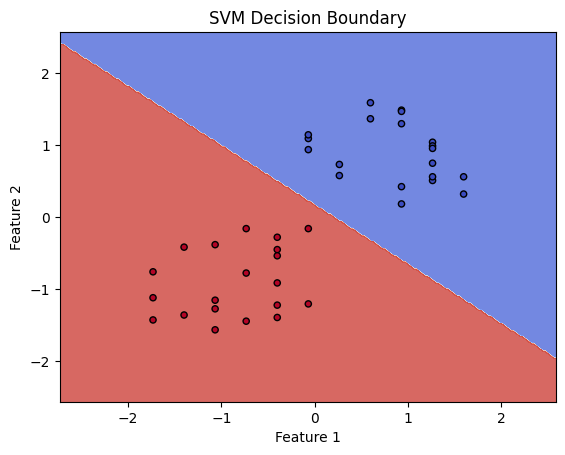

In [15]:
# 8. Visualization of decision boundary (only works with 2D features)
if X_scaled.shape[1] == 2:
    # Create grid to evaluate model
    h = 0.02
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()